# ODD example

This example works step by step through the Open Data Detector Example.

In [36]:
import acts
import math
from IPython.display import SVG
from acts.examples.odd import getOpenDataDetector

In [2]:
detector = getOpenDataDetector()
trackingGeometry = detector.trackingGeometry()
decorators = detector.contextDecorators()
# Get the surface map from the tracking geometry
surfaceMap = trackingGeometry.geoIdSurfaceMap()

DD4hep           WARN  ++ STD conditions NOT defined by client. NTP defaults taken.
Detector         WARN  +++ Object 'compact_checksum' is already defined. New value will be ignored
15:05:31    DD4hepConver   INFO      Translating DD4hep geometry into Acts geometry
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: BeamPipe
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: Pixels
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: PST
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: ShortStrips
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: LongStrips
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: Solenoid
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: ECal
15:05:31    DD4hepConver   INFO      Translating DD4hep sub detector: HCal
15:05:31    D2A_V:ECal     INFO      No layers present, returning nullptr
15:05:31    TrackingGeom   INFO      

Warning in <TGeoMixture::ComputeDerivedQuantities>: Mixture PE: sum of weights is: 6


Create a test geometry context.

In [3]:
gContext = acts.GeometryContext()

Convert the surfaces into actsvg proto surfaces for displaying.

In [ ]:
# The styles: pix, sstrip and lstrip

# Pixels
pixStyle = acts.svg.Style()
pixStyle.fillColor = (51, 153, 255)
pixStyle.strokeColor = (51, 153, 255)
pixStyle.strokeWidth = 2
pixOptions = acts.svg.SurfaceOptions()
pixOptions.style = pixStyle

pixRange = acts.Extent()
pixRange.setRange(acts.AxisDirection.AxisR, (0, 200))

# Short Strips
ssStyle = acts.svg.Style()
ssStyle.fillColor = (51, 204, 51)
ssStyle.strokeColor = (51, 204, 51)
ssStyle.strokeWidth = 2
ssOptions = acts.svg.SurfaceOptions()
ssOptions.style = ssStyle

ssRange = acts.Extent()
ssRange.setRange(acts.AxisDirection.AxisR, (210, 780))

# Long Strips
lsStyle = acts.svg.Style()
lsStyle.fillColor = (255, 51, 0)
lsStyle.strokeColor = (255, 51, 0)
lsStyle.strokeWidth = 2
lsOptions = acts.svg.SurfaceOptions()
lsOptions.style = lsStyle

lsRange = acts.Extent()
lsRange.setRange(acts.AxisDirection.AxisR, (210, 780))

# x-y view extent
viewRangeXY = acts.Extent()
viewRangeXY.setRange(acts.AxisDirection.AxisZ, (-150, 150))

# z-r view extent
viewRangeZR = acts.Extent()
viewRangeZR.setRange(acts.AxisDirection.AxisPhi, (-0.1*math.pi, 0.1*math.pi))


In [38]:

# The surface options for the SVG
pSurfaces = []
pSurfacesXY = []
pSurfacesZR = []
for geoId, surface in surfaceMap.items():
    # Add the xy surface
    sExtent = surface.extent(gContext)
    sOptions = pixOptions if pixRange.contains(sExtent) else ssOptions if ssRange.contains(sExtent) else lsOptions

    # convert the surface to a proto surface
    pSurface = acts.svg.convertSurface(gContext, surface, sOptions)
    pSurfaces.append(pSurface)
    if viewRangeXY.contains(sExtent):
        pSurfacesXY.append(pSurface)

    if viewRangeZR.contains(sExtent):
        pSurfacesZR.append(pSurface)

## View of the detector using `actsvg`

### X-Y view

Create an XY view of the sensitive detector surfaces using `actsvg`, a plugin to ACTS. Only a central slize in Z is shown to remove display complexity.

In [45]:

svgSurfacesXY = []

# Create the SVG surfaces
for pSurface in pSurfacesXY:
   svgSurfacesXY.append(acts.svg.viewSurface(pSurface, 'test', 'xy'))

# Create the SVG file
xyFile = acts.svg.file()
xyFile.addObjects(svgSurfacesXY)
xyFile.write('odd_sensitives_xy.svg')

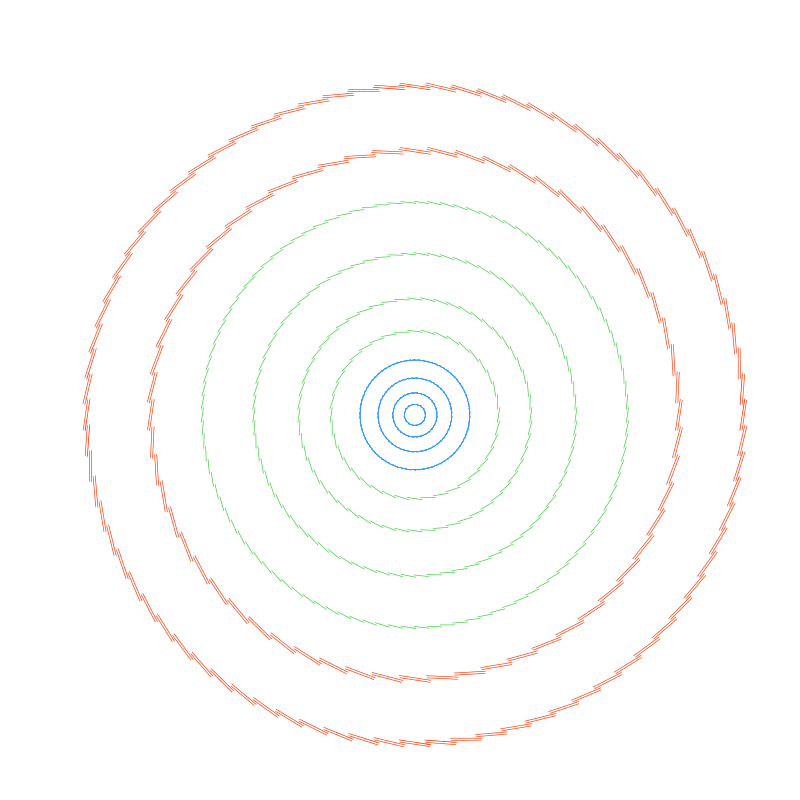

In [46]:
# Display the SVG file
display(SVG('odd_sensitives_xy.svg'))

### Z-R view

In this case, only a small phi slice is shown to remove display complexity.

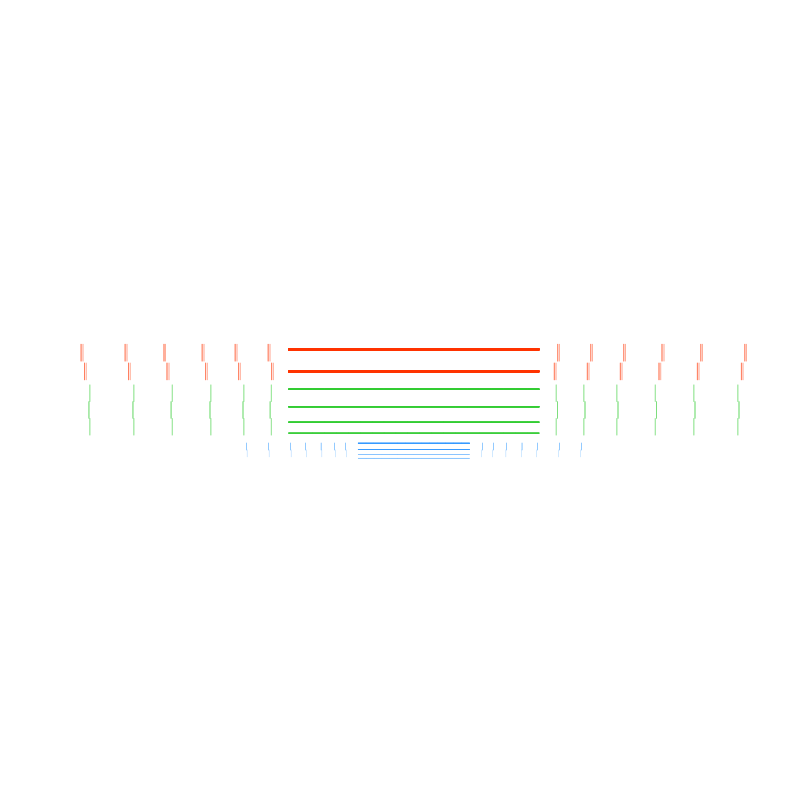

In [ ]:
svgSurfacesZR = []

# Create the SVG surfaces
for pSurface in pSurfacesZR:
   svgSurfacesZR.append(acts.svg.viewSurface(pSurface, 'test', 'zr'))

# Create the SVG file
zrFile = acts.svg.file()
zrFile.addObjects(svgSurfacesZR)
zrFile.write('odd_sensitives_zr.svg')
display(SVG('odd_sensitives_zr.svg'))